### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In the end, **<span style="color:red">add the evaluation of your CNN performances</span>** like that used for the DNN.

In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-06-07 12:34:55.750710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Di seguito è eseguita la doppia conversione al fine di ottenere le immagini nel formato richiesto (28, 28, 1).

In [2]:
#RESHAPE DATA IN ORDER TO USE CONVOLUTIONAL LAYERS
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# first reshaping (probably useless)
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(filters=10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # 28x28 --> 14x14 perchè così miglioro la performance e riduco la probabilità di overfitting
    model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())    # diventa un vettore
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='tanh'))
    model.add(Dense(10, activation='softmax'))  # è necessario usare softmax poichè è un problema di classificazione
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [4]:
# training parameters
batch_size = 32
epochs = 20

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6605 - acc: 0.8048 - val_loss: 0.1887 - val_acc: 0.9441
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2306 - acc: 0.9330 - val_loss: 0.1286 - val_acc: 0.9602
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1732 - acc: 0.9477 - val_loss: 0.1007 - val_acc: 0.9699
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1424 - acc: 0.9566 - val_loss: 0.0879 - val_acc: 0.9732
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1269 - acc: 0.9623 - val_loss: 0.0753 - val_acc: 0.9769
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1134 - acc: 0.9656 - val_loss: 0.0683 - val_acc: 0.9785
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1011 - acc: 0.9697 - val_loss: 0.0640 - val_acc: 0.9796
Epoch 8/20
1875/1875 [==============================] -

313/313 [==============================] - 1s 2ms/step - loss: 0.0419 - acc: 0.9873

Test loss: 0.04187957942485809
Test accuracy: 0.9872999787330627


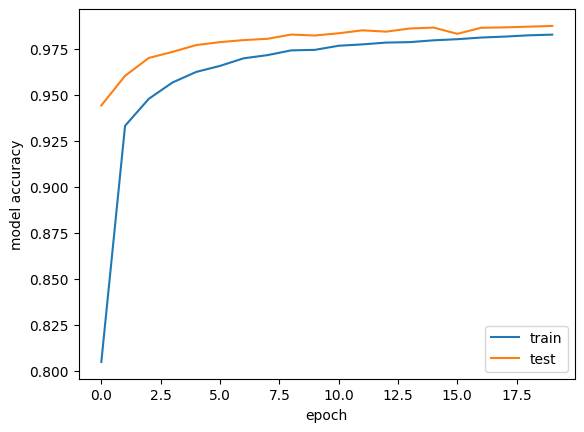

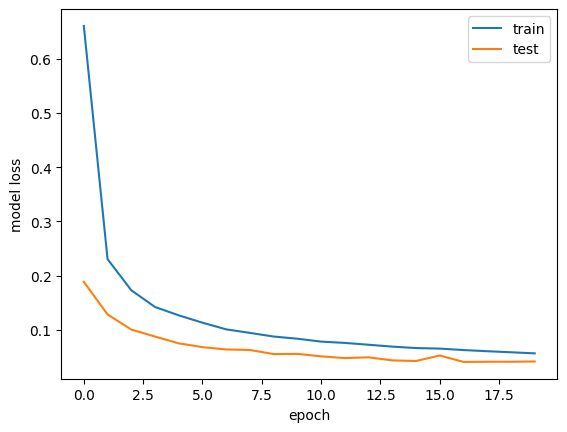

In [5]:
# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 2ms/step


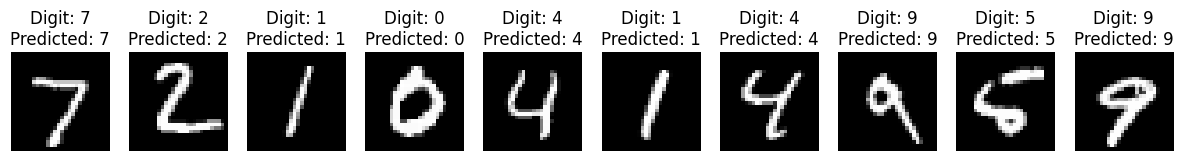

In [6]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Ho fatto evolvere un modello (lo stesso di quello delle slides, quindi diverso da quello presentato) per 50 epoche: dopo circa 15/20 epoche la loss function si stabilizza (vedi sotto). Quindi, nel prosieguo dell'esercizio il numero di epoche è stato fissato a 20.

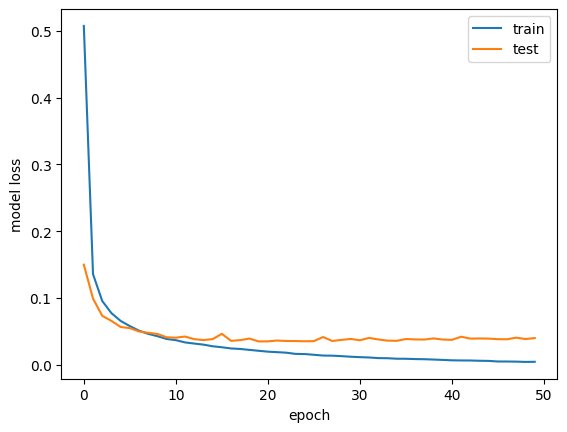

In [7]:
from IPython.display import display
from PIL import Image

img = Image.open("es2_loss_50.png")
display(img)

COMMENTI:

- si è verificato che nel caso dei Dense layers la funzione di attivazione che funziona meglio è 'tanh' (piuttosto che 'relu');
- il numero riscontrato essere ideale di hidden layers dopo Flatten è di tre (due di tipo Dense ed uno di Dropout);
- il rate di Dropout migliore è stato 0.2;
- la loss faunction di Test è sotto quella di Train: ciò è dovuto alla presenza di layer di Dropout.

Nella struttura del modello utilizzato sono stati inseriti, tra gli altri, i seguenti elementi:
- layers di MaxPooling al fine di migliorare la performance e ridurre la probabilità di overfitting;
- layer di tipo Flatten poichè l'output deve essere un vettore di 10 componenti;
- la funzione di attivazione del layer di output deve essere di tipo softmax dal momento che si tratta di un problema di classificazione.

Di seguito è stato salvato il modello per utilizzarlo nell'esercizio 3.

In [8]:
#SAVE THE MODEL
save_model_path='CNN_image_recognition.h5'
model_CNN.save(filepath=save_model_path, include_optimizer=True)